In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data_frame = pd.read_excel('/content/drive/MyDrive/1-SEEG10_GERAL-BR_UF_2022.10.27-FINAL-SITE.xlsx', sheet_name='GEE Estados')

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
data_frame.head()

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,Emissão,COVNM (t),SP,OUTRA_IND,...,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,N2O (t),SP,OUTRA_IND,...,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO (t),SP,OUTRA_IND,...,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,NOx (t),SP,OUTRA_IND,...,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,SP,OUTRA_IND,...,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000


In [ ]:
data_frame['Emissão / Remoção / Bunker'].unique()

array(['Emissão', 'Emissão NCI', 'Remoção NCI', 'Bunker', 'Remoção'],
      dtype=object)

In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103312 entries, 0 to 103311
Data columns (total 63 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Nível 1 - Setor             103312 non-null  object 
 1   Nível 2                     103312 non-null  object 
 2   Nível 3                     103253 non-null  object 
 3   Nível 4                     90920 non-null   object 
 4   Nível 5                     100788 non-null  object 
 5   Nível 6                     97691 non-null   object 
 6   Emissão / Remoção / Bunker  103312 non-null  object 
 7   Gás                         103312 non-null  object 
 8   Estado                      97374 non-null   object 
 9   Atividade Econômica         102076 non-null  object 
 10  Produto                     37413 non-null   object 
 11  1970                        103312 non-null  float64
 12  1971                        103312 non-null  float64
 13  1972          

---
ℹ
- *Remoções são dados referentes à retirada dos gases estufa, que é o contrário da emissão*
- *NCI são dados não contemplados no inventário nacional*
- *Bunkers são emissões de transporte marítimo e aéreo internacional, portanto não são emissões diretas dos estados.*

*Informação disponível no site do SEEG: https://seeg.eco.br/entenda-as-estimativas*

---

In [ ]:
data_frame['Emissão / Remoção / Bunker'].unique()

array(['Emissão', 'Emissão NCI', 'Remoção NCI', 'Bunker', 'Remoção'],
      dtype=object)

Os valores de remoção devem ser negativos devido a remoção do gas, portanto deve-se fazer uma verificação se de fato eles são

In [ ]:
remocao = ['Remoção', 'Remoção NCI']

In [ ]:
data_frame.loc[data_frame['Emissão / Remoção / Bunker'].isin(remocao), 1970:2021].max()# "loc" permite selecionar colunas e linhas e o max verifica se o valor maximo é 0

1970    0.0
1971    0.0
1972    0.0
1973    0.0
1974    0.0
1975    0.0
1976    0.0
1977    0.0
1978    0.0
1979    0.0
1980    0.0
1981    0.0
1982    0.0
1983    0.0
1984    0.0
1985    0.0
1986    0.0
1987    0.0
1988    0.0
1989    0.0
1990    0.0
1991    0.0
1992    0.0
1993    0.0
1994    0.0
1995    0.0
1996    0.0
1997    0.0
1998    0.0
1999    0.0
2000    0.0
2001    0.0
2002    0.0
2003    0.0
2004    0.0
2005    0.0
2006    0.0
2007    0.0
2008    0.0
2009    0.0
2010    0.0
2011    0.0
2012    0.0
2013    0.0
2014    0.0
2015    0.0
2016    0.0
2017    0.0
2018    0.0
2019    0.0
2020    0.0
2021    0.0
dtype: float64

verificando se os dados 'Bunker' podem ser removidos

In [ ]:
grupo_bunker = data_frame[data_frame['Emissão / Remoção / Bunker'] == 'Bunker'] #guardando numa variavel os valores da coluna que são igual a bunker
estados_nan = grupo_bunker[data_frame['Estado'].notna()] #filtrando os estados que não são nulos
estados_nan

<ipython-input-9-910529f91161>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  estados_nan = grupo_bunker[data_frame['Estado'].notna()] #filtrando os estados que não são nulos


,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021


In [ ]:
dados_invalidos = ['Remoção', 'Remoção NCI', 'Emissão NCI', 'Bunker' ]

In [ ]:
df_atualizado = data_frame[~data_frame['Emissão / Remoção / Bunker'].isin(dados_invalidos)]#A função "isin" faz a filtragem dos dados com base na lista que eu criei
df_atualizado['Emissão / Remoção / Bunker'].unique()

array(['Emissão'], dtype=object)

In [ ]:
df_atualizado.head()

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,Emissão,COVNM (t),SP,OUTRA_IND,...,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,N2O (t),SP,OUTRA_IND,...,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO (t),SP,OUTRA_IND,...,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,NOx (t),SP,OUTRA_IND,...,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,SP,OUTRA_IND,...,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000


como só restou um tipo de Emissão/Remoção/Bunker, a coluna pode ser eliminada

In [ ]:
df_atualizado = df_atualizado.drop(columns=['Emissão / Remoção / Bunker'])#remove a coluna 'Emissão / Remoção / Bunker' com a função drop
df_atualizado.head()

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,...,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,...,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,...,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,...,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,...,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000


In [ ]:
df_atualizado['Nível 1 - Setor'].unique()

array(['Processos Industriais', 'Agropecuária', 'Energia', 'Resíduos ',
       'Mudança de Uso da Terra e Floresta'], dtype=object)

In [ ]:
df_atualizado['Estado'].unique()

array(['SP', 'BA', 'RJ', 'MG', 'SE', 'PR', nan, 'RO', 'AM', 'PA', 'TO',
       'MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'MT', 'MS', 'GO', 'DF',
       'ES', 'SC', 'RS', 'AC', 'AP', 'RR'], dtype=object)

In [ ]:
Reg_Sul = ['ES', 'SC', 'RS', 'AC', 'AP', 'RR']

In [ ]:
df_sul = df_atualizado[df_atualizado['Estado'].isin(Reg_Sul)]
df_sul

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
107,Processos Industriais,Produtos Minerais,Produção de Cimento,NaN,NaN,NaN,CO2 (t),ES,CIM,NaN,...,9.420202e+05,9.603806e+05,9.947903e+05,9.146343e+05,774170.207613,6.760657e+05,3.279480e+05,2.836249e+05,3.006042e+05,3.306078e+05
111,Processos Industriais,Produtos Minerais,Produção de Cimento,NaN,NaN,NaN,CO2 (t),SC,CIM,NaN,...,7.126368e+05,6.421719e+05,8.163383e+05,6.769844e+05,527268.576533,5.143665e+05,5.130451e+05,5.451073e+05,6.144431e+05,7.179804e+05
112,Processos Industriais,Produtos Minerais,Produção de Cimento,NaN,NaN,NaN,CO2 (t),RS,CIM,NaN,...,8.012213e+05,8.021637e+05,7.466539e+05,6.627806e+05,546675.329448,5.079599e+05,4.881930e+05,4.921312e+05,5.410035e+05,6.037168e+05
132,Processos Industriais,Produtos Minerais,Produção de Cimento,NaN,NaN,NaN,CO2e (t) GWP-AR2,ES,CIM,NaN,...,9.420202e+05,9.603806e+05,9.947903e+05,9.146343e+05,774170.207613,6.760657e+05,3.279480e+05,2.836249e+05,3.006042e+05,3.306078e+05
136,Processos Industriais,Produtos Minerais,Produção de Cimento,NaN,NaN,NaN,CO2e (t) GWP-AR2,SC,CIM,NaN,...,7.126368e+05,6.421719e+05,8.163383e+05,6.769844e+05,527268.576533,5.143665e+05,5.130451e+05,5.451073e+05,6.144431e+05,7.179804e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103221,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pampa,NaN,Desmatamento,NaN,CO2e (t) GWP-AR2,RS,AGROPEC,NaN,...,1.108518e+06,1.479183e+06,9.718840e+05,9.948190e+05,769868.000000,9.057280e+05,9.238730e+05,1.046432e+06,1.439095e+06,1.432812e+06
103222,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pampa,NaN,Desmatamento,NaN,CO2e (t) GWP-AR4,RS,AGROPEC,NaN,...,1.196999e+06,1.599471e+06,1.045298e+06,1.070678e+06,830805.000000,9.748940e+05,9.924510e+05,1.124747e+06,1.543126e+06,1.541087e+06
103223,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pampa,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,RS,AGROPEC,NaN,...,1.221927e+06,1.635136e+06,1.062603e+06,1.089187e+06,847534.000000,9.918540e+05,1.007627e+06,1.142614e+06,1.563684e+06,1.566694e+06
103224,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pampa,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,RS,AGROPEC,NaN,...,1.232994e+06,1.649637e+06,1.072887e+06,1.099601e+06,855306.000000,1.001321e+06,1.017557e+06,1.153771e+06,1.579514e+06,1.581831e+06


In [ ]:
AM=['AM']
df_AM = df_atualizado[df_atualizado['Nível 1 - Setor'].isin(AM)]
df_AM


,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021


In [ ]:
df_atualizado[(df_atualizado['Estado'] == 'AM') & (df_atualizado['Nível 1 - Setor'] == 'Mudança de Uso da Terra e Floresta')]


,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
81262,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,CO2 (t),AM,AGROPEC,NaN,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
81271,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,CO2e (t) GTP-AR2,AM,AGROPEC,NaN,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
81280,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,CO2e (t) GTP-AR4,AM,AGROPEC,NaN,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
81289,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,CO2e (t) GTP-AR5,AM,AGROPEC,NaN,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
81298,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,CO2e (t) GTP-AR6,AM,AGROPEC,NaN,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102803,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Amazônia,NaN,Desmatamento,NaN,CO2e (t) GWP-AR2,AM,AGROPEC,NaN,...,2.239997e+06,3.186571e+06,2.973253e+06,4.796274e+06,7.396711e+06,4.362453e+06,4.434835e+06,7074966.0,8746520.0,8429758.0
102812,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Amazônia,NaN,Desmatamento,NaN,CO2e (t) GWP-AR4,AM,AGROPEC,NaN,...,2.505953e+06,3.565317e+06,3.330733e+06,5.368844e+06,8.276064e+06,4.888099e+06,4.967871e+06,7929733.0,9799770.0,9408067.0
102821,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Amazônia,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,AM,AGROPEC,NaN,...,2.651128e+06,3.772286e+06,3.528292e+06,5.683071e+06,8.756712e+06,5.179207e+06,5.262358e+06,8404321.0,10382705.0,9929881.0
102830,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Amazônia,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,AM,AGROPEC,NaN,...,2.661898e+06,3.787545e+06,3.541992e+06,5.705721e+06,8.792123e+06,5.199159e+06,5.282817e+06,8436366.0,10422789.0,9973416.0


In [ ]:
pa_agro = df_atualizado.loc[(df_atualizado['Estado'] == 'PA') & (df_atualizado['Nível 1 - Setor'] == 'Agropecuária'), 2021].max()
pa_agro

36856969.7986

modificando o formato do df, transformando as colunas dos anos em uma 'anos'

In [ ]:
df_atualizado.columns

Index([    'Nível 1 - Setor',             'Nível 2',             'Nível 3',
                   'Nível 4',             'Nível 5',             'Nível 6',
                       'Gás',              'Estado', 'Atividade Econômica',
                   'Produto',                  1970,                  1971,
                        1972,                  1973,                  1974,
                        1975,                  1976,                  1977,
                        1978,                  1979,                  1980,
                        1981,                  1982,                  1983,
                        1984,                  1985,                  1986,
                        1987,                  1988,                  1989,
                        1990,                  1991,                  1992,
                        1993,                  1994,                  1995,
                        1996,                  1997,                  1998,
            

In [ ]:
df_atualizado.loc[:, 'Nível 1 - Setor':'Produto'].columns #selecionando as colunas até produtos

Index(['Nível 1 - Setor', 'Nível 2', 'Nível 3', 'Nível 4', 'Nível 5',
       'Nível 6', 'Gás', 'Estado', 'Atividade Econômica', 'Produto'],
      dtype='object')

In [ ]:
colunas_info = list(df_atualizado.loc[:, 'Nível 1 - Setor':'Produto'].columns)
colunas_info

['Nível 1 - Setor',
 'Nível 2',
 'Nível 3',
 'Nível 4',
 'Nível 5',
 'Nível 6',
 'Gás',
 'Estado',
 'Atividade Econômica',
 'Produto']

In [ ]:
lista_anos = df_atualizado.loc[:, 1970:2021].columns
lista_anos

Index([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021],
      dtype='object')

O parâmetro id_vars é utilizado para identificar os nomes das colunas que serão mantidas no momento da transformação. Já o parâmetro value_vars é utilizado para identificar as colunas que serão transformadas nas colunas principais do formato long, uma contendo as categorias com os nomes das colunas e outra contendo os valores. O parâmetro var_name é usado para nomear a coluna contendo as categorias e o parâmetro value_name para nomear a coluna com os valores numéricos.

In [ ]:
 df_atualizado.melt(id_vars = colunas_info, value_vars = lista_anos, var_name = 'Anos', value_name = 'Emissão')
 #A função melt, serve para transformar varias colunas numéricas que tratam de um mesmo assunto,
 #como foi o caso desse excel, no qual havia uma linha para cada ano

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Anos,Emissão
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,1970,368.0
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,1970,115.0
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,1970,1925100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4926891,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,MS,AGROPEC,NaN,2021,1004191.0
4926892,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MT,AGROPEC,NaN,2021,443120.0
4926893,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MS,AGROPEC,NaN,2021,1009968.0
4926894,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,N2O (t),MT,AGROPEC,NaN,2021,479.0


In [ ]:
emissoes_por_ano = df_atualizado.melt(id_vars = colunas_info, value_vars = lista_anos, var_name = 'Anos', value_name = 'Emissão')


agrupando gases

In [ ]:
emissoes_por_ano.groupby('Gás')

In [ ]:
emissoes_por_ano.groupby('Gás').groups #groups acessa todos os grupos criados

{'C2F6 (t)': [410, 411, 412, 425, 426, 427, 95158, 95159, 95160, 95173, 95174, 95175, 189906, 189907, 189908, 189921, 189922, 189923, 284654, 284655, 284656, 284669, 284670, 284671, 379402, 379403, 379404, 379417, 379418, 379419, 474150, 474151, 474152, 474165, 474166, 474167, 568898, 568899, 568900, 568913, 568914, 568915, 663646, 663647, 663648, 663661, 663662, 663663, 758394, 758395, 758396, 758409, 758410, 758411, 853142, 853143, 853144, 853157, 853158, 853159, 947890, 947891, 947892, 947905, 947906, 947907, 1042638, 1042639, 1042640, 1042653, 1042654, 1042655, 1137386, 1137387, 1137388, 1137401, 1137402, 1137403, 1232134, 1232135, 1232136, 1232149, 1232150, 1232151, 1326882, 1326883, 1326884, 1326897, 1326898, 1326899, 1421630, 1421631, 1421632, 1421645, 1421646, 1421647, 1516378, 1516379, 1516380, 1516393, ...], 'CF4 (t)': [407, 408, 409, 422, 423, 424, 95155, 95156, 95157, 95170, 95171, 95172, 189903, 189904, 189905, 189918, 189919, 189920, 284651, 284652, 284653, 284666, 284667

In [ ]:
emissoes_por_ano.groupby('Gás').get_group('CO2e (t) GTP-AR2') #get_group, retorna um grupo especifico

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Anos,Emissão
5,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GTP-AR2,SP,OUTRA_IND,NaN,1970,1.676700e+06
9,Processos Industriais,Indústria Química,Produção de Ácido Nítrico,NaN,NaN,NaN,CO2e (t) GTP-AR2,BA,OUTRA_IND,NaN,1970,0.000000e+00
13,Processos Industriais,Indústria Química,Produção de Ácido Nítrico,NaN,NaN,NaN,CO2e (t) GTP-AR2,RJ,OUTRA_IND,NaN,1970,2.388998e+02
17,Processos Industriais,Indústria Química,Produção de Ácido Nítrico,NaN,NaN,NaN,CO2e (t) GTP-AR2,SP,OUTRA_IND,NaN,1970,9.957345e+04
22,Processos Industriais,Indústria Química,Produção de Acrilonitrila,NaN,NaN,NaN,CO2e (t) GTP-AR2,BA,OUTRA_IND,NaN,1970,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...
4926744,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Mata Atlântica,NaN,Desmatamento,NaN,CO2e (t) GTP-AR2,SP,AGROPEC,NaN,2021,3.714380e+05
4926745,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Mata Atlântica,NaN,Desmatamento,NaN,CO2e (t) GTP-AR2,SE,AGROPEC,NaN,2021,1.904400e+04
4926867,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pampa,NaN,Desmatamento,NaN,CO2e (t) GTP-AR2,RS,AGROPEC,NaN,2021,7.957570e+05
4926878,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GTP-AR2,MT,AGROPEC,NaN,2021,1.853130e+05


In [ ]:
emissao_por_gas = emissoes_por_ano.groupby('Gás')[['Emissão']].sum().sort_values('Emissão', ascending=False)
emissao_por_gas

,Emissão
Gás,
CO2e (t) GWP-AR5,8.181375e+10
CO2e (t) GWP-AR6,8.132316e+10
CO2e (t) GWP-AR4,8.015921e+10
CO2e (t) GWP-AR2,7.720596e+10
CO2e (t) GTP-AR2,6.344612e+10
CO2e (t) GTP-AR4,6.344612e+10
CO2e (t) GTP-AR6,6.247859e+10
CO2e (t) GTP-AR5,6.182200e+10
CO2 (t),5.324636e+10


<Axes: xlabel='Emissão', ylabel='Gas'>

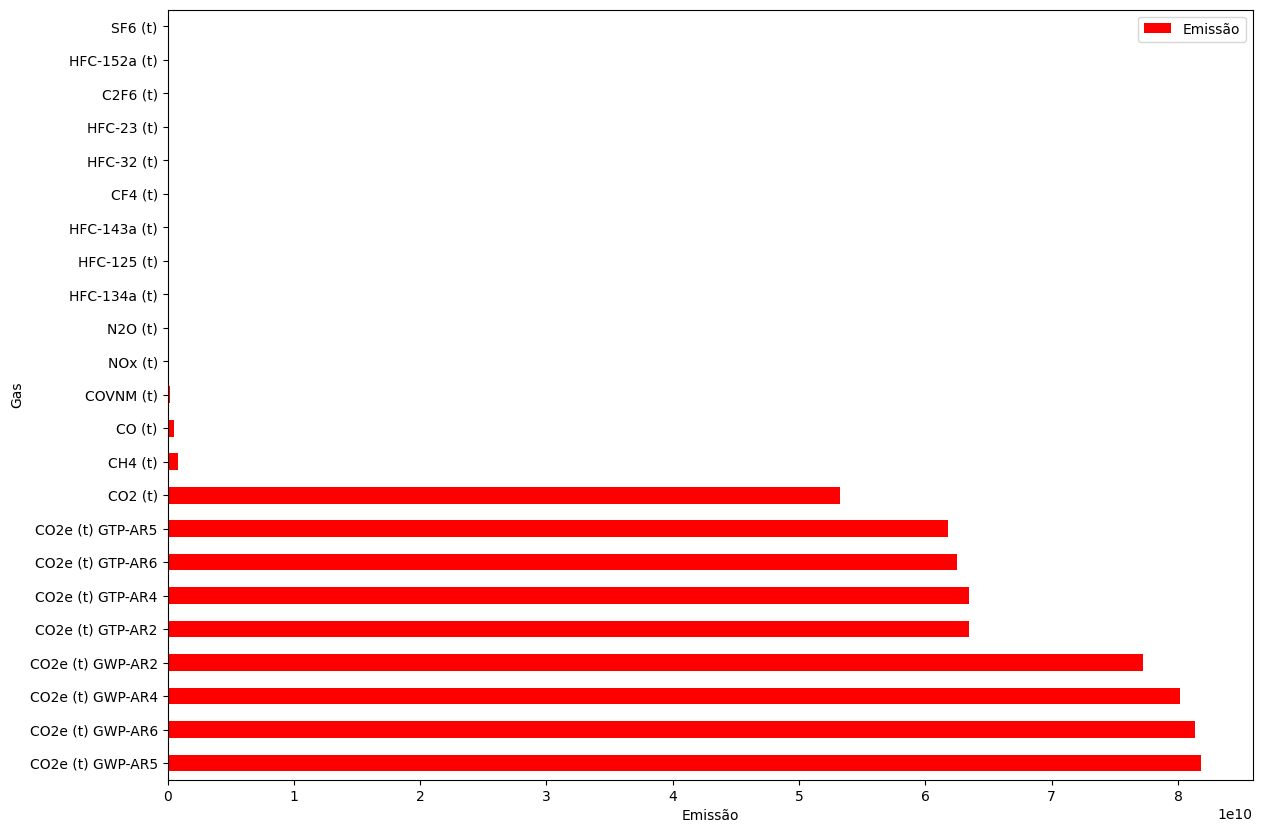

In [ ]:
emissao_por_gas.plot(kind = 'barh', figsize = (14, 10), color = 'red', ylabel = 'Gas', xlabel = 'Emissão')

como o co2 é muito mais emitido, é bom calcular a proporção de emissão de co2 em relação aos outros gases

In [ ]:
co2 = emissao_por_gas.iloc[:9]
co2

,Emissão
Gás,
CO2e (t) GWP-AR5,8.181375e+10
CO2e (t) GWP-AR6,8.132316e+10
CO2e (t) GWP-AR4,8.015921e+10
CO2e (t) GWP-AR2,7.720596e+10
CO2e (t) GTP-AR2,6.344612e+10
CO2e (t) GTP-AR4,6.344612e+10
CO2e (t) GTP-AR6,6.247859e+10
CO2e (t) GTP-AR5,6.182200e+10
CO2 (t),5.324636e+10


In [ ]:
co2.sum()

Emissão    6.249413e+11
dtype: float64

In [ ]:
emissao_por_gas.sum()

Emissão    6.265939e+11
dtype: float64

In [ ]:
co2.sum() / emissao_por_gas.sum()

Emissão    0.997363
dtype: float64

In [ ]:
print(f'A emissão de CO2 corresponde a {float((emissao_por_gas.iloc[0:9].sum()/emissao_por_gas.sum()).iloc[0])*100:.2f} % de emissão total de gases estufa no Brasil de 1970 a 2021.')

A emissão de CO2 corresponde a 99.74 % de emissão total de gases estufa no Brasil de 1970 a 2021.


In [ ]:
emissoes_por_ano.head()

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Anos,Emissão
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,1970,368.0
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,1970,115.0
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,1970,1925100.0


In [ ]:
emissoes_por_ano.groupby('Nível 1 - Setor').groups

{'Agropecuária': [1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, ...], 'Energia': [23277, 23278, 23279, 23280, 23281, 23282, 23283, 23284, 23285, 23286, 23287, 23288, 23289, 23290, 23291, 23292, 23293, 23294, 23295, 23296, 23297, 23298, 23299, 23300, 23301, 23302, 23303, 23304, 23305, 23306, 23307, 23308, 23309, 23310, 23311, 23312, 23313, 23314, 23315, 23316, 23317, 23318, 23319, 23320, 23321, 23322, 23323, 23324, 23325, 23326, 23327, 23328, 

In [ ]:
emissoes_por_ano.groupby('Nível 1 - Setor').get_group('Agropecuária')

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Anos,Emissão
1137,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,CH4 (t),AC,AGR,ALIM_BEBIDAS,1970,0.000000
1138,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,CH4 (t),AL,AGR,ALIM_BEBIDAS,1970,2050.445805
1139,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,CH4 (t),AM,AGR,ALIM_BEBIDAS,1970,0.000000
1140,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,CH4 (t),AP,AGR,ALIM_BEBIDAS,1970,0.000000
1141,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,CH4 (t),BA,AGR,ALIM_BEBIDAS,1970,466.934705
...,...,...,...,...,...,...,...,...,...,...,...,...
4855420,Agropecuária,Solos Manejados,Indiretas,Mineralização de N associado a perda de C no solo,Outros,Solos,N2O (t),RS,AGR,ALIM_BEBIDAS,2021,929.545042
4855421,Agropecuária,Solos Manejados,Indiretas,Mineralização de N associado a perda de C no solo,Outros,Solos,N2O (t),SC,AGR,ALIM_BEBIDAS,2021,295.813919
4855422,Agropecuária,Solos Manejados,Indiretas,Mineralização de N associado a perda de C no solo,Outros,Solos,N2O (t),SE,AGR,ALIM_BEBIDAS,2021,32.734589
4855423,Agropecuária,Solos Manejados,Indiretas,Mineralização de N associado a perda de C no solo,Outros,Solos,N2O (t),SP,AGR,ALIM_BEBIDAS,2021,653.155812


In [ ]:
emissoes_por_ano[emissoes_por_ano['Anos']==2021].groupby('Nível 1 - Setor')[['Emissão']].mean() #media de emissao por setor no ano de 2021

,Emissão
Nível 1 - Setor,
Agropecuária,149793.768835
Energia,72928.637234
Mudança de Uso da Terra e Floresta,690085.511209
Processos Industriais,787101.255789
Resíduos,106106.723386


<Axes: xlabel='Emissão', ylabel='Setor'>

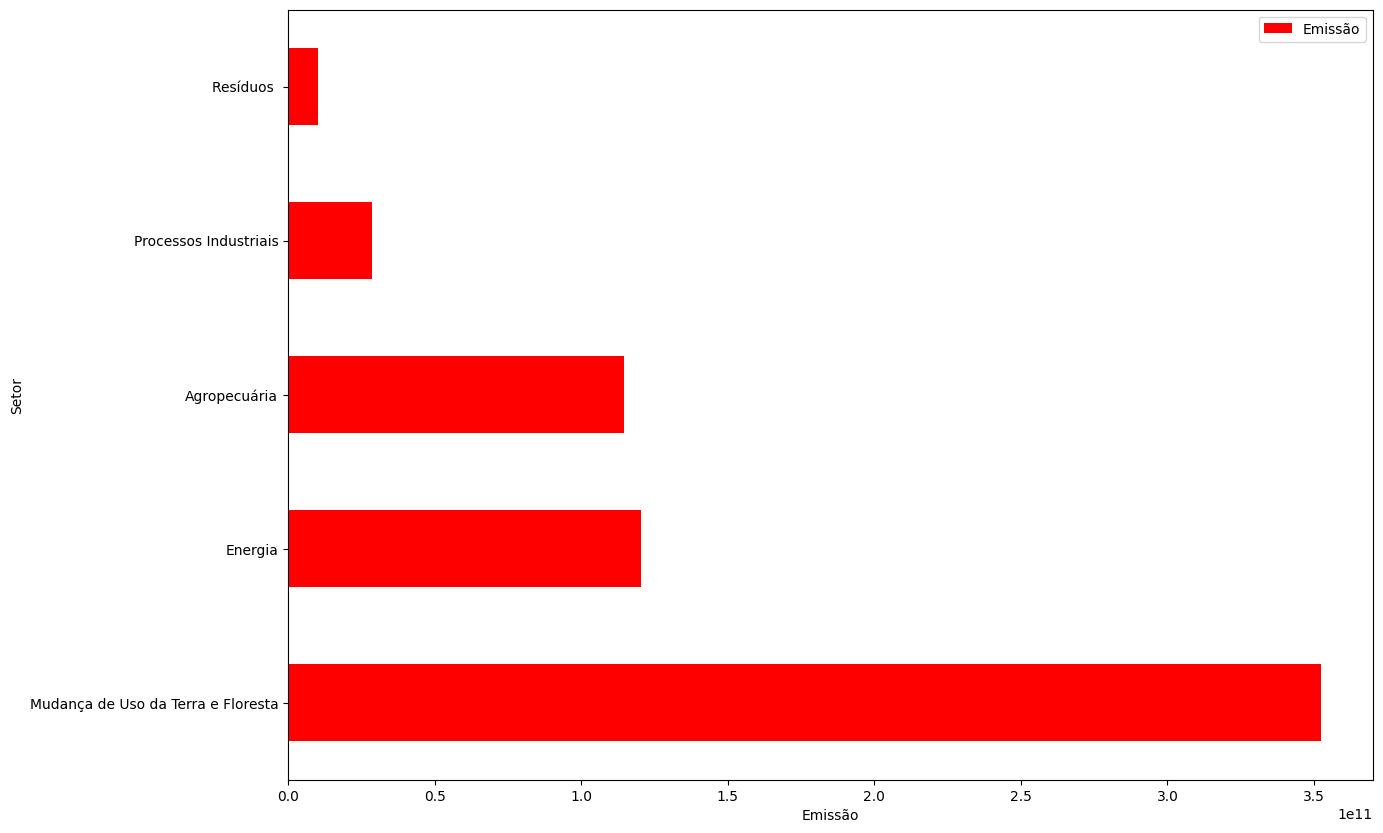

In [ ]:
emissao_por_setor = emissoes_por_ano.groupby('Nível 1 - Setor')[['Emissão']].sum().sort_values('Emissão', ascending=False)
emissao_por_setor.plot(kind = 'barh', figsize = (14, 10), color = 'red', ylabel = 'Setor', xlabel = 'Emissão')

SETORES ECONOMICOS MAIS POLUENTES PARA CADA TIPO DE GÁS

In [ ]:
poluicao_por_tipogas = emissoes_por_ano.groupby(['Gás', 'Nível 1 - Setor'])[['Emissão']].sum()
poluicao_por_tipogas.head(30)

Emissão
Gás              Nível 1 - Setor                                 
C2F6 (t)         Processos Industriais               5.765018e+02
CF4 (t)          Processos Industriais               7.135481e+03
CH4 (t)          Agropecuária                        5.928481e+08
                 Energia                             3.429034e+07
                 Mudança de Uso da Terra e Floresta  8.662166e+07
                 Processos Industriais               2.092132e+06
                 Resíduos                            7.907453e+07
CO (t)           Agropecuária                        7.132479e+07
                 Energia                             3.959769e+08
                 Processos Industriais               4.385133e+07
CO2 (t)          Agropecuária                        5.411750e+08
                 Energia                             1.261352e+10
                 Mudança de Uso da Terra e Floresta  3.733930e+10
                 Processos Industriais               2.729603e+09
                 Resíduos                            2.276264e+07
CO2e (t) GTP-AR2 Agropecuária                        8.297112e+09
                 Energia                             1.306899e+10
                 Mudança de Uso da Terra e Floresta  3.850044e+10
                 Processos Industriais               3.086813e+09
                 Resíduos                            4.927667e+08
CO2e (t) GTP-AR4 Agropecuária                        8.297112e+09
                 Energia                             1.306899e+10
                 Mudança de Uso da Terra e Floresta  3.850044e+10
                 Processos Industriais               3.086813e+09
                 Resíduos                            4.927667e+08
CO2e (t) GTP-AR5 Agropecuária                        7.065371e+09
                 Energia                             1.299683e+10
                 Mudança de Uso da Terra e Floresta  3.831675e+10
                 Processos Industriais               3.039311e+09
                 Resíduos                            4.037413e+08

In [ ]:
poluicao_por_tipogas.xs('CO2 (t)',level = 0).sort_values('Emissão', ascending=False) #EMISSAO DE CO2 PARA CADA ATIVIDADE ECONOMICA

,Emissão
Nível 1 - Setor,
Mudança de Uso da Terra e Floresta,3.733930e+10
Energia,1.261352e+10
Processos Industriais,2.729603e+09
Agropecuária,5.411750e+08
Resíduos,2.276264e+07


In [ ]:
poluicao_por_tipogas.xs('CO2 (t)',level = 0).max()# A função xs é usada para rertornar valores especificos
                                                  # Level = 0, significa que esta buscando na primeira coluna

Emissão    3.733930e+10
dtype: float64

In [ ]:
poluicao_por_tipogas.xs('CO2 (t)',level = 0).idxmax() #retorna o id do valor maximo, ao inves do valor

Emissão    Mudança de Uso da Terra e Floresta
dtype: object

A hierarquia dos índices é da esquerda para a direita, portanto o índice "Gás" ocupa o level 0 de hierarquia e o índice "Nível 1 - Setor" ocupa o level 1 de hierarquia. A seleção de dados a partir dos índices nesse tipo de DataFrame se torna um pouco diferente de um convencional. Podemos usar o método loc para selecionar os dados do primeiro level de forma direta. Logo, para selecionar as informações do gás "CH4", é possível utilizar o código:

dados.loc['CH4 (t)']

Também é possível especificar valores para todos os níveis de índice passando uma tupla para o método loc. Para selecionar a emissão de "Agropecuária" do gás "CH4", podemos usar a tupla ('CH4 (t)', 'Agropecuária'), mantendo a ordem dos níveis:

dados.loc[('CH4 (t)', 'Agropecuária')]

In [ ]:
poluicaoo__Gas = poluicao_por_tipogas.groupby(level=0).idxmax() #Para cada tipo de gás, retorna o setor que mais o emite
poluicaoo__Gas

,Emissão
Gás,
C2F6 (t),"(C2F6 (t), Processos Industriais)"
CF4 (t),"(CF4 (t), Processos Industriais)"
CH4 (t),"(CH4 (t), Agropecuária)"
CO (t),"(CO (t), Energia)"
CO2 (t),"(CO2 (t), Mudança de Uso da Terra e Floresta)"
CO2e (t) GTP-AR2,"(CO2e (t) GTP-AR2, Mudança de Uso da Terra e F..."
CO2e (t) GTP-AR4,"(CO2e (t) GTP-AR4, Mudança de Uso da Terra e F..."
CO2e (t) GTP-AR5,"(CO2e (t) GTP-AR5, Mudança de Uso da Terra e F..."
CO2e (t) GTP-AR6,"(CO2e (t) GTP-AR6, Mudança de Uso da Terra e F..."


In [ ]:
valores_max = poluicao_por_tipogas.groupby(level=0).max().values
valores_max

array([[5.76501774e+02],
       [7.13548128e+03],
       [5.92848132e+08],
       [3.95976946e+08],
       [3.73393003e+10],
       [3.85004383e+10],
       [3.85004383e+10],
       [3.83167456e+10],
       [3.84335874e+10],
       [3.99942414e+10],
       [4.03083713e+10],
       [4.05152299e+10],
       [4.04921633e+10],
       [1.60862332e+08],
       [9.79558000e+03],
       [1.39473100e+05],
       [9.03940000e+03],
       [5.70600000e+02],
       [1.19784000e+03],
       [2.36775000e+03],
       [1.77470246e+07],
       [9.36121468e+07],
       [4.70580000e+02]])

In [ ]:
poluicaoo__Gas.insert(1, 'Valor Maximo', valores_max)#quando se esta trabalhando com df sumarizado, deve-se usar o insert ao inves do assing
poluicaoo__Gas

,Emissão,Valor Maximo
Gás,,
C2F6 (t),"(C2F6 (t), Processos Industriais)",5.765018e+02
CF4 (t),"(CF4 (t), Processos Industriais)",7.135481e+03
CH4 (t),"(CH4 (t), Agropecuária)",5.928481e+08
CO (t),"(CO (t), Energia)",3.959769e+08
CO2 (t),"(CO2 (t), Mudança de Uso da Terra e Floresta)",3.733930e+10
CO2e (t) GTP-AR2,"(CO2e (t) GTP-AR2, Mudança de Uso da Terra e F...",3.850044e+10
CO2e (t) GTP-AR4,"(CO2e (t) GTP-AR4, Mudança de Uso da Terra e F...",3.850044e+10
CO2e (t) GTP-AR5,"(CO2e (t) GTP-AR5, Mudança de Uso da Terra e F...",3.831675e+10
CO2e (t) GTP-AR6,"(CO2e (t) GTP-AR6, Mudança de Uso da Terra e F...",3.843359e+10


GASES MAIS POLUENTES PARA CADA SETOR ECONÔMICO

In [ ]:
poluicaoo__Gas.reset_index(inplace=False) #resetando indices
poluicaoo__Gas

,Emissão,Valor Maximo
Gás,,
C2F6 (t),"(C2F6 (t), Processos Industriais)",5.765018e+02
CF4 (t),"(CF4 (t), Processos Industriais)",7.135481e+03
CH4 (t),"(CH4 (t), Agropecuária)",5.928481e+08
CO (t),"(CO (t), Energia)",3.959769e+08
CO2 (t),"(CO2 (t), Mudança de Uso da Terra e Floresta)",3.733930e+10
CO2e (t) GTP-AR2,"(CO2e (t) GTP-AR2, Mudança de Uso da Terra e F...",3.850044e+10
CO2e (t) GTP-AR4,"(CO2e (t) GTP-AR4, Mudança de Uso da Terra e F...",3.850044e+10
CO2e (t) GTP-AR5,"(CO2e (t) GTP-AR5, Mudança de Uso da Terra e F...",3.831675e+10
CO2e (t) GTP-AR6,"(CO2e (t) GTP-AR6, Mudança de Uso da Terra e F...",3.843359e+10


In [ ]:
poluicaoo__Gas.pivot_table(index='Nível 1 - Setor', values='Valor Maximo')

#poluicaoo__Gas.swaplevel(0, 1).groupby(level=0).idxmax()
# Reordenar o índice para refletir a troca
#df.sort_index(inplace=True)


KeyError: 'Nível 1 - Setor'

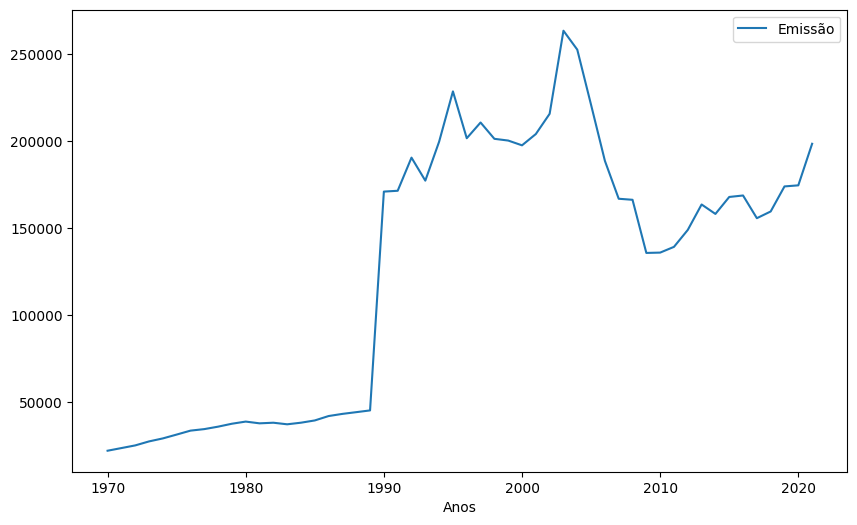

In [ ]:
emissoes_por_ano.groupby('Anos')[['Emissão']].mean().plot(figsize=(10,6));

In [ ]:
emissoes_por_ano.groupby('Anos')[['Emissão']].mean().idxmax()

Emissão    2003
dtype: int64

In [ ]:
emissoes_por_ano.groupby(['Anos', 'Gás'])[['Emissão']].mean()

Emissão
Anos Gás                     
1970 C2F6 (t)        0.232610
     CF4 (t)         3.557421
     CH4 (t)      1471.024024
     CO (t)       2155.556658
     CO2 (t)     19244.913199
...                       ...
2021 HFC-23 (t)      0.000000
     HFC-32 (t)    261.100000
     N2O (t)       119.295311
     NOx (t)       679.395431
     SF6 (t)         5.240000

[1196 rows x 1 columns]

In [ ]:
media_emissao_anual = emissoes_por_ano.groupby(['Anos', 'Gás'])[['Emissão']].mean().reset_index(inplace=False)
media_emissao_anual

,Anos,Gás,Emissão
0,1970,C2F6 (t),0.232610
1,1970,CF4 (t),3.557421
2,1970,CH4 (t),1471.024024
3,1970,CO (t),2155.556658
4,1970,CO2 (t),19244.913199
...,...,...,...
1191,2021,HFC-23 (t),0.000000
1192,2021,HFC-32 (t),261.100000
1193,2021,N2O (t),119.295311
1194,2021,NOx (t),679.395431


In [ ]:
media_emissao_anual.pivot_table(index='Anos', columns='Gás', values='Emissão') #pivot_table, transformou a coluna Gas em varias colunas

Gás,C2F6 (t),CF4 (t),CH4 (t),CO (t),CO2 (t),CO2e (t) GTP-AR2,CO2e (t) GTP-AR4,CO2e (t) GTP-AR5,CO2e (t) GTP-AR6,CO2e (t) GWP-AR2,...,COVNM (t),HFC-125 (t),HFC-134a (t),HFC-143a (t),HFC-152a (t),HFC-23 (t),HFC-32 (t),N2O (t),NOx (t),SF6 (t)
Anos,,,,,,,,,,,,,,,,,,,,,
1970,0.232610,3.557421,1471.024024,2155.556658,19244.913199,20821.379814,20821.379814,19162.726020,19775.283385,35396.183865,...,742.074863,0.000000,0.000000,0.000000,0.0,0.00,0.00,31.632709,154.072797,0.000
1971,0.334611,5.117360,1525.506914,2259.625805,21598.587743,22466.288595,22466.288595,20748.481445,21386.175802,37570.982886,...,730.119047,0.000000,0.000000,0.000000,0.0,0.00,0.00,32.609237,170.550178,0.000
1972,0.404684,6.189025,1584.719568,2418.944795,23664.445521,24100.305265,24100.305265,22303.224240,22966.797327,39800.768350,...,774.278817,0.000000,0.000000,0.000000,0.0,0.00,0.00,34.311864,188.856161,0.000
1973,0.463147,7.083136,1642.612439,2596.053853,27726.668829,26683.827206,26683.827206,24827.077028,25516.409611,42947.755490,...,796.866394,0.000000,0.000000,0.000000,0.0,0.00,0.00,35.278689,217.320480,0.000
1974,0.471026,7.203619,1704.614365,2681.450599,30155.918952,28539.318732,28539.318732,26600.481407,27321.124852,45431.240064,...,1024.694923,0.000000,0.000000,0.000000,0.0,0.00,0.00,37.098183,247.521415,0.000
1975,0.502952,7.691893,1854.360821,2730.894830,32292.965771,30593.767465,30593.767465,28507.669059,29285.642221,48944.729581,...,1065.682750,0.000000,0.000000,0.000000,0.0,0.00,0.00,39.451008,262.716346,0.000
1976,0.577172,8.826970,1932.641716,2702.494362,35640.344723,33066.878007,33066.878007,30879.481709,31693.226162,52203.028009,...,1091.778909,0.000000,0.000000,0.000000,0.0,0.00,0.00,41.583225,287.013048,0.000
1977,0.692855,10.596169,1931.897645,2675.992077,37313.909077,34182.312333,34182.312333,31967.243034,32784.131397,53333.605735,...,1147.712448,0.000000,0.000000,0.000000,0.0,0.00,0.00,42.571086,292.405821,0.000
1978,0.749660,11.464915,1921.281930,2755.891877,40669.820049,35969.633601,35969.633601,33762.778999,34580.720998,55015.291182,...,1289.853564,0.000000,0.000000,0.000000,0.0,0.00,0.00,42.426649,322.982906,0.000


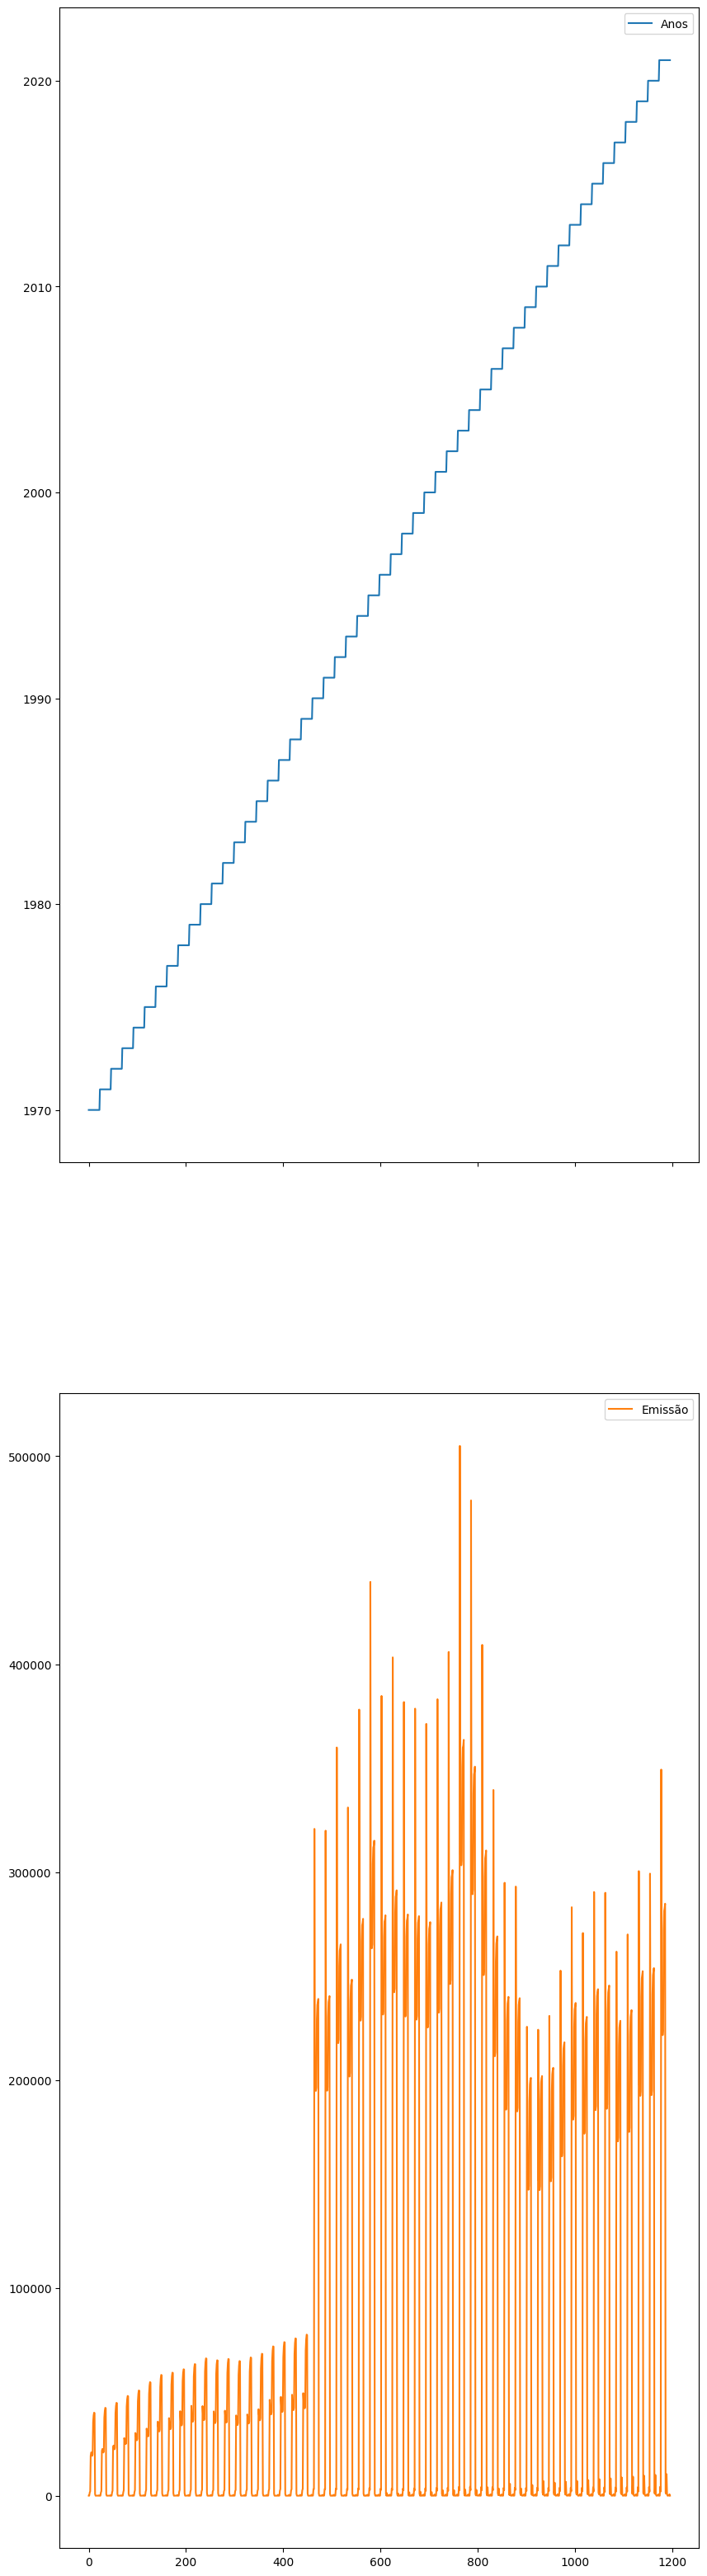

In [ ]:
media_emissao_anual.plot(subplots = True, figsize = (10, 40));